### GI data

In [1]:
import os # this allows simple navigation of folders in the notebook
import pandas as pd # this loads Pandas
import numpy as np # This loads NumPy, used to do maths in the notebook
from ebmdatalab import bq # this loads the bennett institute bigquery function
import glob
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib created a temporary cache directory at /tmp/matplotlib-gpsq5eto because the default path (/tmp/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Define function

def bnf_code_filter(df, bnf_code, part_code, excluded_part_code=None):
    # Filter by included prefixes. returns true if it starts with the included prefixes.
    included_bnf_codes = df[bnf_code].str.startswith(tuple(part_code))
    
    # If there are excluded prefixes, filter those out. returns true if containing excluded prefixes, which are then inverted to false.
    if excluded_part_code:
        excluded_bnf_code = ~df[bnf_code].str.startswith(tuple(excluded_part_code))
    else:
        excluded_bnf_code = True  # No exclusion, so all are included.

    # Apply both filters. only true if both the included are true.
    filtered_df = df[included_bnf_codes & excluded_bnf_code]
    
    return filtered_df


#### Load datasets

- gi_df: prescribing data, for 0101 and 0103 of the BNF, from 2019-01 to 2024-05
- bnf_df: hierarchical data for legacy bnf codes and names
- practice_df: practice info, including setting code (4=GP practice)
- statistics_df: practice list sizes per month
- ccg_df: CCG/SICBL information

In [3]:
# Load prescribing data from compressed csv chunks
file_pattern = os.path.join("..","data","omep_df_chunk_*.csv.gz") #creates a file path
file_names = glob.glob(file_pattern) # List all files matching the pattern
gi_df = pd.concat([pd.read_csv(file, compression='gzip') for file in file_names], ignore_index=True) # Load each compressed CSV file (decompressing them) into a DataFrame and concatenate them. This is a list comprehension.
bnf_df = pd.read_csv(os.path.join("..","data","bnf_df.csv")) #pd.read_csv is the function that loads it into the DataFrame
practices_df = pd.read_csv(os.path.join("..","data","practices_df.csv"))
statistics_df = pd.read_csv(os.path.join("..","data","statistics_df.csv"))
ccg_df = pd.read_csv(os.path.join("..","data","ccg_df.csv"))

In [4]:
gi_df.head()

,month,pct,practice,bnf_name,bnf_code,items,quantity,net_cost,actual_cost
0,2023-04-01,36L,H83611,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,8,280.0,27.20,25.70305
1,2023-04-01,B2M3M,M86001,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,8,252.0,24.48,23.14266
2,2023-04-01,W2U3Z,E85696,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,140.0,13.60,12.91352
3,2023-04-01,99F,F81061,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,258.0,25.06,23.80102
4,2023-04-01,15E,M85164,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,364.0,35.36,33.39660


In [5]:
bnf_df.head()

,chapter,chapter_code,section,section_code,para,para_code,subpara,subpara_code,chemical,chemical_code,product,product_code,presentation,presentation_code
0,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Other antacid and simeticone preparations,010101000,Proprietary compound preparation BNF 0101010,010101000BB,Indigestion mixture,010101000BBAJA0
1,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Alexitol sodium,0101010A0,Alexitol sodium,0101010A0AA,Alexitol sodium 360mg tablets,0101010A0AAAAAA
2,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Alexitol sodium,0101010A0,Actal,0101010A0BB,Actal 360mg tablets,0101010A0BBAAAA
3,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Aluminium hydroxide,0101010C0,Aluminium hydroxide,0101010C0AA,Aluminium hydroxide 475mg capsules,0101010C0AAAAAA
4,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Aluminium hydroxide,0101010C0,Aluminium hydroxide,0101010C0AA,Aluminium hydroxide oral suspension sugar free,0101010C0AAACAC


In [6]:
ranitidine_code = ['0103010T0']
ranitidine_exclude_codes = ['0103010T0AAADAD', '0103010T0BBADAD']

In [7]:
data_filtered_ranitidine = bnf_code_filter(gi_df, 'bnf_code', ranitidine_code, ranitidine_exclude_codes)
print(data_filtered_ranitidine)

               month    pct practice  \
666171    2019-02-01    05G   M83089   
666172    2019-02-01    27D   N81087   
666173    2019-02-01    91Q   G82057   
666174    2019-02-01    00V   P83011   
666175    2019-02-01    01J   N83043   
...              ...    ...      ...   
12909531  2019-03-01    15E   Y03835   
12909532  2019-03-01    15E   M85730   
12909533  2019-03-01    99E   F81186   
12909534  2019-03-01    36L   H85022   
12909535  2019-03-01  A3A8R   F84686   

                                              bnf_name         bnf_code  \
666171    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666172    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666173    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666174    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666175    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
...                                                ...              .

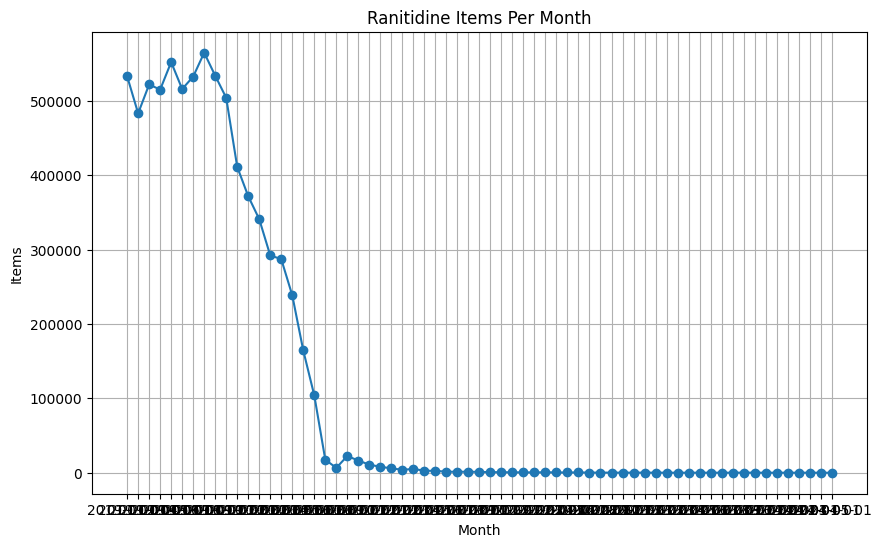

In [8]:
ranitidine_monthly_totals = data_filtered_ranitidine.groupby('month')['items'].sum().reset_index()#grouping dataset by month. the resulting data set has 2 columns, months and items.

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(ranitidine_monthly_totals['month'], ranitidine_monthly_totals['items'], marker='o') #3 things, x axis define, y axis define, and marker.

# Add titles and labels
plt.title('Ranitidine Items Per Month')
plt.xlabel('Month')
plt.ylabel('Items')

# Show the plot
plt.grid(True)
plt.show()

In [10]:
alternative_H2RA = ['0103010H0', '0103010N0', '0103010D0']
alternative_H2RA_exclude_codes = ['0103010D0AAAEAE', '0103010D0BBAEAE', '0103010N0BBACAC', '0103010N0AAACAC']

In [11]:
data_filtered_alternative_H2RA = bnf_code_filter(gi_df, 'bnf_code', alternative_H2RA, alternative_H2RA_exclude_codes)

print(data_filtered_alternative_H2RA)

               month    pct practice                   bnf_name  \
666400    2020-07-01  A3A8R   F86045   Cimetidine 200mg tablets   
666408    2020-07-01    05D   M83013   Cimetidine 200mg tablets   
666410    2020-07-01    06Q   F81122   Cimetidine 200mg tablets   
666411    2020-07-01    15N   L83131   Cimetidine 200mg tablets   
666414    2020-07-01    91Q   G82790   Cimetidine 200mg tablets   
...              ...    ...      ...                        ...   
12927894  2019-03-01    04V   C82102  Nizatidine 300mg capsules   
12927895  2019-03-01    11J   J81051  Nizatidine 300mg capsules   
12927896  2019-03-01    14L   P84068  Nizatidine 300mg capsules   
12927897  2019-03-01    15N   L83096  Nizatidine 300mg capsules   
12927898  2019-03-01    15N   L83002  Nizatidine 300mg capsules   

                 bnf_code  items  quantity  net_cost  actual_cost  
666400    0103010D0AAAAAA      8     210.0     64.92     61.20313  
666408    0103010D0AAAAAA     10     596.0    184.18    171

In [12]:
H2RA_monthly_totals = data_filtered_alternative_H2RA.groupby('month')['items'].sum().reset_index()

print(H2RA_monthly_totals)

         month   items
0   2019-01-01    4640
1   2019-02-01    4171
2   2019-03-01    4475
3   2019-04-01    4382
4   2019-05-01    4646
..         ...     ...
60  2024-01-01  257052
61  2024-02-01  247258
62  2024-03-01  255719
63  2024-04-01  269714
64  2024-05-01  282042

[65 rows x 2 columns]


In [14]:
PPI_code = ['0103050E0', '0103050L0', '0103050P0', '0103050R0', '0103050T0']
PPI_exclude_codes = ['0103050E0AAACAC', '0103050E0BBACAC', '0103050P0BBAHBG', '0103050P0BBAGAV', '0103050P0AABGBG', '0103050P0AAAVAV', '0103050R0AAACAC', '0103050R0BBACAC']

In [15]:
antacids_code = ['010101', '0101021C0AA', '010102100BBAXA0', '0101021C0BNAAAF', '0101021C0BJABAF', '0101021C0BJAAAF', '0101021C0BBAAAF']
antacids_exclude_codes = ['0101010F0AABABA', '0101010F0AABCBC', '0101010F0AABBBB', '0101010F0AAAXAX', '0101010F0AAAVAV', '0101010F0AAAZAZ', '0101010F0AAAYAY', '0101010F0AAAWAW', '0101010F0AABDBD', '0101010J0AAAIAI', '0101010J0AAAJAJ', '0101010J0AAAKAK', '010101000BB', '010101000BBAJA0', '010101200AA', '010101200AAABAB', '010101200AAACAC']

In [16]:
data_filtered_PPI = bnf_code_filter(gi_df, 'bnf_code', PPI_code, PPI_exclude_codes)
print(data_filtered_PPI)

               month    pct practice  \
0         2023-04-01    36L   H83611   
1         2023-04-01  B2M3M   M86001   
2         2023-04-01  W2U3Z   E85696   
3         2023-04-01    99F   F81061   
4         2023-04-01    15E   M85164   
...              ...    ...      ...   
13253511  2023-11-01    00Y   Y02827   
13253512  2023-11-01    15E   M85048   
13253513  2023-08-01    00N   A88002   
13253514  2023-08-01    15F   B86104   
13253515  2023-08-01    07K   D83075   

                                           bnf_name         bnf_code  items  \
0         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      8   
1         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      8   
2         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      9   
3         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      9   
4         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      9   
...                                          

In [17]:
data_filtered_antacids = bnf_code_filter(gi_df, 'bnf_code', antacids_code, antacids_exclude_codes)
print(data_filtered_antacids)

               month    pct practice  \
666148    2022-02-01  W2U3Z   E87024   
666155    2022-02-01  A3A8R   F84050   
666164    2022-05-01    93C   F85019   
666165    2022-05-01  M1J4Y   E81032   
666167    2022-05-01    13T   A85019   
...              ...    ...      ...   
12722226  2019-03-01    15N   L83666   
12722228  2019-03-01  W2U3Z   Y00902   
12722230  2019-03-01    72Q   G83052   
12722236  2019-03-01    52R   C84017   
12722238  2019-03-01    02G   P81710   

                                                   bnf_name         bnf_code  \
666148                              Mucogel oral suspension  0101010G0BCABAB   
666155                              Mucogel oral suspension  0101010G0BCABAB   
666164                              Mucogel oral suspension  0101010G0BCABAB   
666165           SodiBic 420mg/5ml (1mmol/ml) oral solution  0101012B0BCAAAB   
666167    Co-magaldrox 195mg/220mg/5ml oral suspension s...  0101010G0AAABAB   
...                                    

In [18]:
PPI_monthly_totals = data_filtered_PPI.groupby('month')['items'].sum().reset_index()
print (PPI_monthly_totals)

         month    items
0   2019-01-01  5209246
1   2019-02-01  4705857
2   2019-03-01  5078594
3   2019-04-01  5008732
4   2019-05-01  5354303
..         ...      ...
60  2024-01-01  6503445
61  2024-02-01  6100512
62  2024-03-01  6205119
63  2024-04-01  6430734
64  2024-05-01  6569924

[65 rows x 2 columns]


In [19]:
antacids_monthly_totals = data_filtered_antacids.groupby('month')['items'].sum().reset_index()

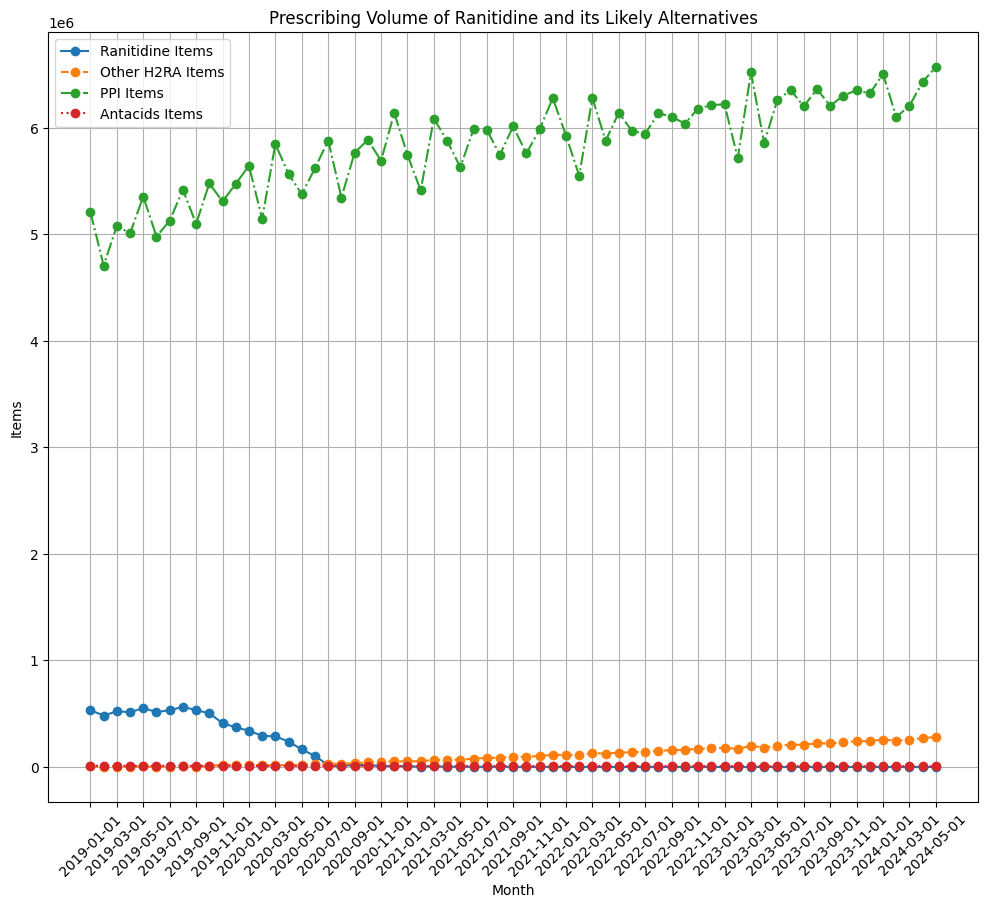

In [30]:
# Create matplotlib graph - Monthly items for all 3 classes + rantidine

plt.figure(figsize=(12, 10))

# Plot monthly totals for ranitidine
plt.plot(ranitidine_monthly_totals['month'], ranitidine_monthly_totals['items'], marker='o', label='Ranitidine Items')

# Plot monthly totals for Alternative H2RA chemicals
plt.plot(H2RA_monthly_totals['month'], H2RA_monthly_totals['items'], marker='o', linestyle='--', label='Other H2RA Items')

#Plot monthly totals for PPIs
plt.plot(PPI_monthly_totals['month'], PPI_monthly_totals['items'], marker='o', linestyle='-.', label='PPI Items')

#Plot monthly totals for antacids
plt.plot(antacids_monthly_totals['month'], antacids_monthly_totals['items'], marker='o', linestyle=':', label='Antacids Items')

# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and its Likely Alternatives')
plt.xlabel('Month')
plt.ylabel('Items')

# Adding a legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

#Specifying x ticks 
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)

# Display the plot
plt.show()

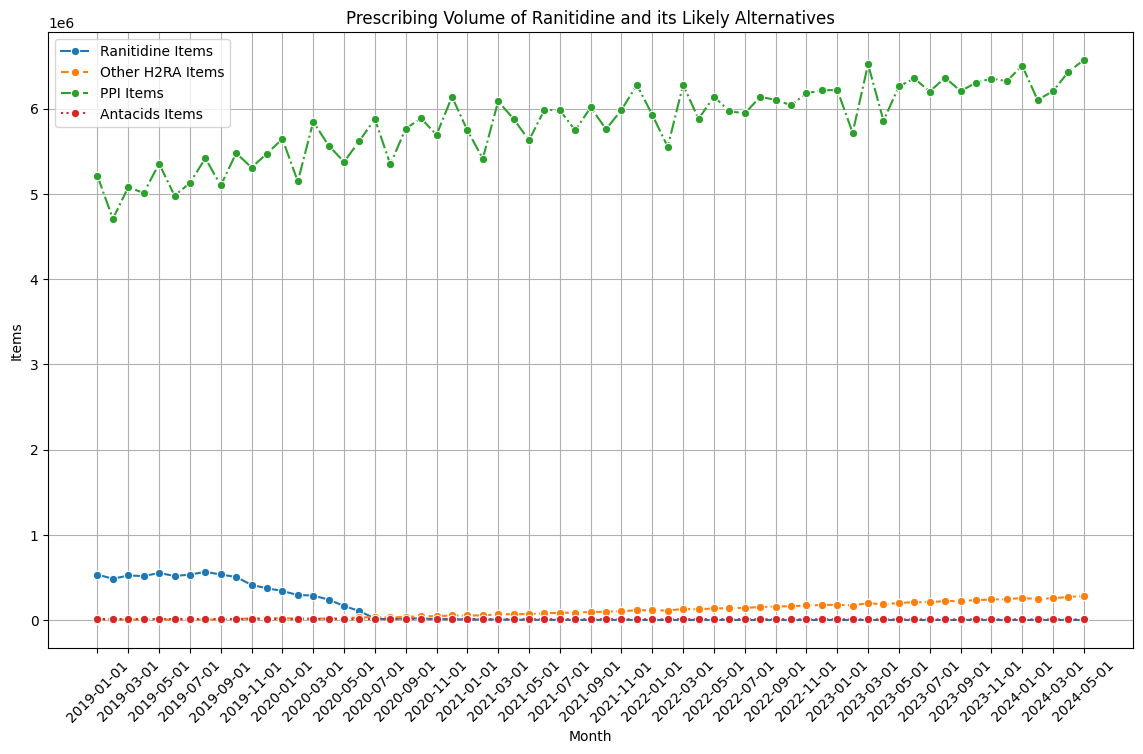

In [31]:
# Create a Seaborn figure for all 3 classes + ranitidine
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
 
# Plot the original monthly totals for Ranitidine using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Ranitidine Items')
 
# Plot the aggregated totals for the Alternative H2RA chemicals
sns.lineplot(data=H2RA_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Other H2RA Items')

#Plot monthly totals for PPIs
sns.lineplot(data=PPI_monthly_totals, x='month', y='items', marker='o', linestyle='-.', label='PPI Items')

#Plot monthly totals for antacids 
sns.lineplot(data=antacids_monthly_totals, x='month', y='items', marker='o', linestyle=':', label='Antacids Items')

 
# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)
 
# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)
 
# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and its Likely Alternatives')
plt.xlabel('Month')
plt.ylabel('Items')
 
# Add a legend to differentiate the lines
plt.legend()
 
# Adding grid for better readability
plt.grid(True)
 
# Display the plot
plt.show()